In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno  # New library for missing value visualization
from scipy import stats
import warnings
warnings.filterwarnings('ignore')

# Set visualization defaults
plt.style.use('seaborn-v0_8-whitegrid')
plt.rcParams['figure.figsize'] = (12, 8)
sns.set_palette('viridis')

# Load dataset
df = pd.read_csv('../data/house_prices.csv')

# Check dimensions
print(f"Dataset dimensions: {df.shape}")
print(f"Number of features: {df.shape[1] - 1}")  # Excluding target variable

# Preview data
df.head()


Dataset dimensions: (2930, 83)
Number of features: 82


,Unnamed: 0,Order,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,...,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
0,0,1,526301100,20,RL,141.0,31770,Pave,NaN,IR1,...,0,NaN,NaN,NaN,0,5,2010,WD,Normal,215000
1,1,2,526350040,20,RH,80.0,11622,Pave,NaN,Reg,...,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal,105000
2,2,3,526351010,20,RL,81.0,14267,Pave,NaN,IR1,...,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal,172000
3,3,4,526353030,20,RL,93.0,11160,Pave,NaN,Reg,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,244000
4,4,5,527105010,60,RL,74.0,13830,Pave,NaN,IR1,...,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal,189900


object     43
int64      29
float64    11
Name: count, dtype: int64
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2930 entries, 0 to 2929
Data columns (total 83 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Unnamed: 0       2930 non-null   int64  
 1   Order            2930 non-null   int64  
 2   PID              2930 non-null   int64  
 3   MS SubClass      2930 non-null   int64  
 4   MS Zoning        2930 non-null   object 
 5   Lot Frontage     2440 non-null   float64
 6   Lot Area         2930 non-null   int64  
 7   Street           2930 non-null   object 
 8   Alley            198 non-null    object 
 9   Lot Shape        2930 non-null   object 
 10  Land Contour     2930 non-null   object 
 11  Utilities        2930 non-null   object 
 12  Lot Config       2930 non-null   object 
 13  Land Slope       2930 non-null   object 
 14  Neighborhood     2930 non-null   object 
 15  Condition 1      2930 non-null   objec

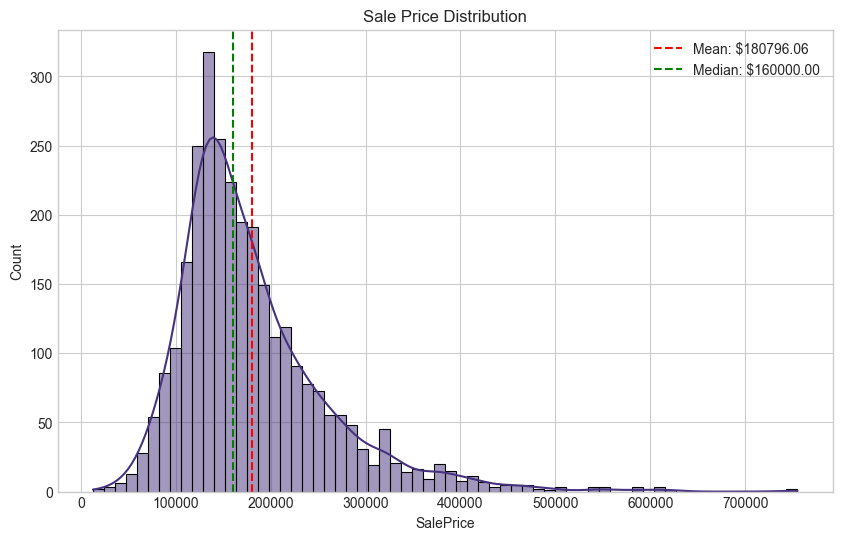

Skewness of SalePrice: 1.7435


In [4]:
# Check data types
print(df.dtypes.value_counts())

# Quick info summary
df.info()

# Separate numeric and categorical columns
numeric_cols = df.select_dtypes(include=['int64', 'float64']).columns.tolist()
cat_cols = df.select_dtypes(include=['object']).columns.tolist()

print(f"Number of numeric features: {len(numeric_cols)}")
print(f"Number of categorical features: {len(cat_cols)}")

# Check target variable (SalePrice) distribution
plt.figure(figsize=(10, 6))
sns.histplot(df['SalePrice'], kde=True)
plt.title('Sale Price Distribution')
plt.axvline(df['SalePrice'].mean(), color='r', linestyle='--', label=f"Mean: ${df['SalePrice'].mean():.2f}")
plt.axvline(df['SalePrice'].median(), color='g', linestyle='--', label=f"Median: ${df['SalePrice'].median():.2f}")
plt.legend()
plt.show()

# Check for skewness
print(f"Skewness of SalePrice: {df['SalePrice'].skew():.4f}")
